# Linear Regression with Python Scikit Learn
**In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### Simple Linear Regression
**In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Task Number : 1
### Prediction Using Supervised Machine Learning

### Author: Akshay Sunil

## Problem Statement:
**Predict the percentage of an student based on the no. of study hours.
**What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows: 25
Number of columns: 2


In [4]:
print('Numerical Columns:')
print(list(df.select_dtypes('number').columns))

Numerical Columns:
['Hours', 'Scores']


All columns are numerical columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no missing values in the data.

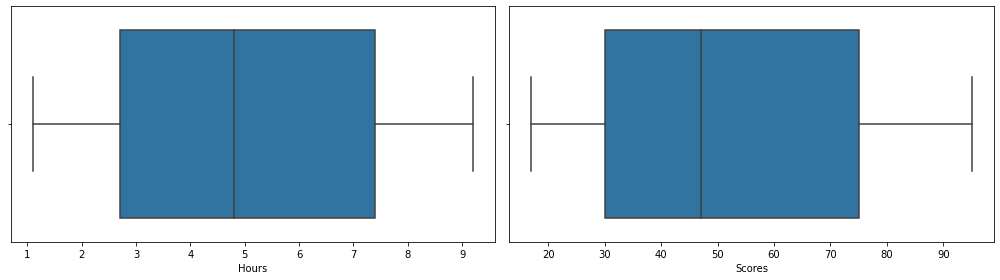

In [7]:
## Checking for outliers in the data.
fig,axis = plt.subplots(1,2,figsize=(14,4))
for i,col in enumerate(df.columns):
    sns.boxplot(x=df[col],ax=axis[i])
    plt.tight_layout()

There are no outliers / extreme values in the data.

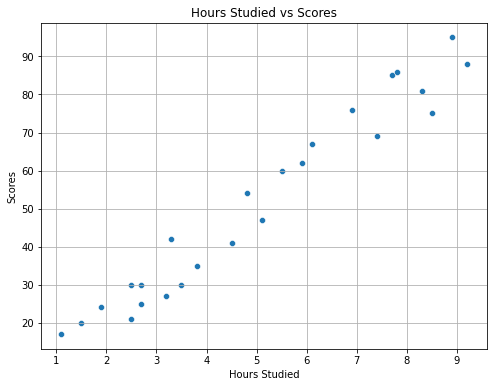

In [8]:
## Visualizing the Spread of Data
plt.figure(figsize=(8,6))
sns.scatterplot(x='Hours', y='Scores',data=df)
plt.grid()
plt.title('Hours Studied vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

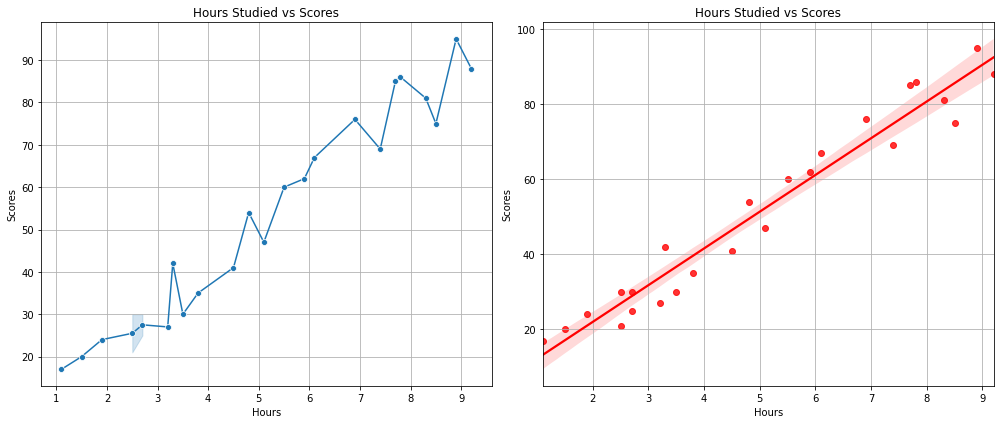

In [9]:
## Checking the linear relationship between the data.
fig,axis = plt.subplots(1,2,figsize=(14,6))
axis[0].set_title('Hours Studied vs Scores')
axis[1].set_title('Hours Studied vs Scores')
axis[0].grid()
axis[1].grid()
sns.lineplot(x='Hours', y='Scores',data=df,marker='o',ax=axis[0])
sns.regplot(x='Hours', y='Scores',data=df,marker='o',ax=axis[1],color='r')
plt.tight_layout()

We can see that the two features, Hours and Scores; have a fairly linear relationship.

***Inferences:***
1. Both variables have have a linear relationship
2. As the number of Hours increases, the score obtained by the student increases.

## Stats Model - Ordinary Least Squares

In [10]:
from statsmodels.api import OLS, add_constant
from sklearn.model_selection import train_test_split

In [49]:
X = df['Hours'].values
y = df['Scores'].values
Xc = add_constant(X)

### Train Test Split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(Xc,y,test_size=0.3,random_state=42)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 2)
(8, 2)
(17,)
(8,)


### OLS Model

In [52]:
model = OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     308.6
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           2.05e-11
Time:                        12:46:02   Log-Likelihood:                -53.419
No. Observations:                  17   AIC:                             110.8
Df Residuals:                      15   BIC:                             112.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7942      3.209      0.871      0.398      -4.046       9.634
x1             9.7105      0.553     17.567      0.000       8.532      10.889
==============================================================================
Omnibus:                        4.492   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                1.583
Skew:                          -0.294   Prob(JB):                        0.453
Kurtosis:                       1.626   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
print('Intercept =',model.params[0])

Intercept = 2.7941966765998174


In [54]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [55]:
y_train_pred=model.predict(X_train)

print('Train')
print('R2 Score:',r2_score(y_train,y_train_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Error:',mean_absolute_error(y_train,y_train_pred))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_train,y_train_pred))

y_test_pred=model.predict(X_test)

print('\n\nTest')
print('R2 Score:',r2_score(y_test,y_test_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_test_pred))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_test_pred))

Train
R2 Score: 0.9536486503889446
Root Mean Squared Error: 5.6034193128261665
Mean Absolute Error: 5.1708315630914194
Mean Absolute Percentage Error: 0.11528614476408011


Test
R2 Score: 0.9487647340257012
Root Mean Squared Error: 4.8599853512281035
Mean Absolute Error: 4.499999999999998
Mean Absolute Percentage Error: 0.12161098657057007


In [61]:
print('Predicted Score if a student studies for 9.25 hours (using OLS model):',model.predict([1,9.25])[0])

Predicted Score if a student studies for 9.25 hours (using OLS model): 92.61670033840093


## Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [43]:
X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1)

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [45]:
lr.fit(X_train,y_train)

y_train_pred=lr.predict(X_train)

print('Train')
print('R2 Score:',r2_score(y_train,y_train_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Error:',mean_absolute_error(y_train,y_train_pred))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_train,y_train_pred))

y_test_pred=lr.predict(X_test)

print('\n\nTest')
print('R2 Score:',r2_score(y_test,y_test_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_test_pred))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_test_pred))

Train
R2 Score: 0.9536486503889446
Root Mean Squared Error: 5.603419312826166
Mean Absolute Error: 5.1708315630914194
Mean Absolute Percentage Error: 0.11528614476408017


Test
R2 Score: 0.9487647340257012
Root Mean Squared Error: 4.859985351228103
Mean Absolute Error: 4.499999999999998
Mean Absolute Percentage Error: 0.12161098657057001


In [71]:
score=lr.predict(np.array([9.25]).reshape(-1,1))[0][0]

In [72]:
print('Predicted Score if a student studies for 9.25 hours (using LR model):',score)

Predicted Score if a student studies for 9.25 hours (using LR model): 92.61670033840096
